<a href="https://colab.research.google.com/github/Saurabh019/Incubyte_Campus_placement-2023-/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#Building an image classifier
import tensorflow as tf
from tensorflow import keras

In [8]:
tf.__version__

'2.13.0'

In [14]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


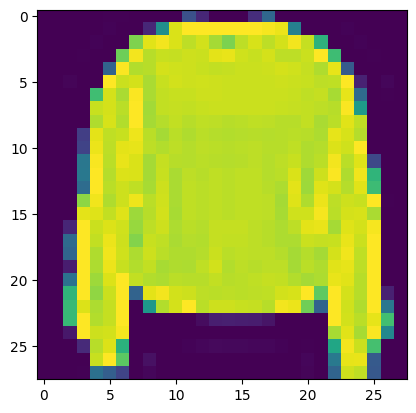

In [19]:
plt.imshow(X_train_full[7])

In [20]:
y_train_full[7]

2

In [21]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Bag","Ankle Boot","Sneaker"]

In [23]:
class_names[y_train_full[1]]

'T-shirt/top'

In [24]:
class_names[y_train_full[0]]

'Sneaker'

In [25]:
X_train_full[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [26]:
# Data Normalisation
X_train_n = X_train_full/255
X_test_n = X_test/255

Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into
train/validation. Here is how each type of dateset is used in deep learning:
Training data — used for training the model
Validation data — used for tuning the hyperparameters and evaluate the models
Test data — used to test the model after the model has gone through initial vetting by the validation set.

In [27]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
x_test = X_test_n

In [28]:
X_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

Create the model architecture
There are two APIs for defining a model in Keras:
Sequential model API
Functional API

In [30]:
np.random.seed(0)
tf.random.set_seed(0)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(20,activation="softmax"))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 20)                2020      
                                                                 
Total params: 317820 (1.21 MB)
Trainable params: 317820 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
import visualkeras
from PIL import Image, ImageDraw, ImageFont
font = ImageFont.truetype("arial.ttf", 2)
visualkeras.layered_view(model, legend=True, font=font)

OSError: ignored

In [42]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 11.0 MB/s eta 0:00:00


In [49]:
weights, biases = model.layers[2].get_weights()

In [50]:
weights

array([[-0.03298458,  0.10163862,  0.02637731, ...,  0.10671491,
         0.07518993, -0.07430834],
       [-0.10001459,  0.06372116, -0.07418039, ...,  0.01421662,
        -0.03583749,  0.0869268 ],
       [ 0.00861931, -0.00952119,  0.06567984, ..., -0.06788136,
        -0.10148929,  0.05179115],
       ...,
       [-0.09289646, -0.0399107 , -0.01104403, ..., -0.06852317,
        -0.03388326,  0.05219067],
       [ 0.09069271,  0.09657905,  0.00151421, ..., -0.03271335,
         0.07269841, -0.05131269],
       [-0.08260024,  0.09899721, -0.08378751, ...,  0.06396428,
         0.02909612,  0.09998711]], dtype=float32)

In [51]:
weights.shape

(300, 200)

In [53]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [54]:
biases.shape

(200,)

In [55]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="sgd",metrics="accuracy")

In [56]:
model_history = model.fit(X_train,y_train,epochs=30,batch_size=40,validation_data=(X_valid,y_valid))

Epoch 1/30
1375/1375 [==============================] - 9s 6ms/step - loss: 0.8185 - accuracy: 0.7277 - val_loss: 0.5117 - val_accuracy: 0.8272
Epoch 2/30
1375/1375 [==============================] - 8s 5ms/step - loss: 0.5054 - accuracy: 0.8236 - val_loss: 0.4534 - val_accuracy: 0.8448
Epoch 3/30
1375/1375 [==============================] - 10s 7ms/step - loss: 0.4523 - accuracy: 0.8423 - val_loss: 0.4230 - val_accuracy: 0.8566
Epoch 4/30
1375/1375 [==============================] - 9s 6ms/step - loss: 0.4205 - accuracy: 0.8527 - val_loss: 0.4184 - val_accuracy: 0.8562
Epoch 5/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3968 - accuracy: 0.8614 - val_loss: 0.3758 - val_accuracy: 0.8694
Epoch 6/30
1375/1375 [==============================] - 8s 6ms/step - loss: 0.3774 - accuracy: 0.8666 - val_loss: 0.3618 - val_accuracy: 0.8740
Epoch 7/30
1375/1375 [==============================] - 8s 6ms/step - loss: 0.3624 - accuracy: 0.8712 - val_loss: 0.3590 - val_accuracy

In [57]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1375}

In [58]:
model_history.history

{'loss': [0.8185227513313293,
  0.5053827166557312,
  0.45229727029800415,
  0.4204593300819397,
  0.39683273434638977,
  0.37737295031547546,
  0.36237379908561707,
  0.3481782078742981,
  0.33754757046699524,
  0.327804297208786,
  0.3188570439815521,
  0.3094923198223114,
  0.302670955657959,
  0.29538390040397644,
  0.2893672287464142,
  0.2826216518878937,
  0.2765125632286072,
  0.2713611125946045,
  0.26558127999305725,
  0.259627103805542,
  0.254564493894577,
  0.25014638900756836,
  0.24489545822143555,
  0.24212495982646942,
  0.23669444024562836,
  0.23291924595832825,
  0.22786693274974823,
  0.22370776534080505,
  0.22017650306224823,
  0.2152498960494995],
 'accuracy': [0.7277272939682007,
  0.8235636353492737,
  0.8423091173171997,
  0.8527091145515442,
  0.8614363670349121,
  0.8665817975997925,
  0.871218204498291,
  0.8760363459587097,
  0.880436360836029,
  0.8830909132957458,
  0.8859999775886536,
  0.8884181976318359,
  0.8898909091949463,
  0.8928727507591248,
  

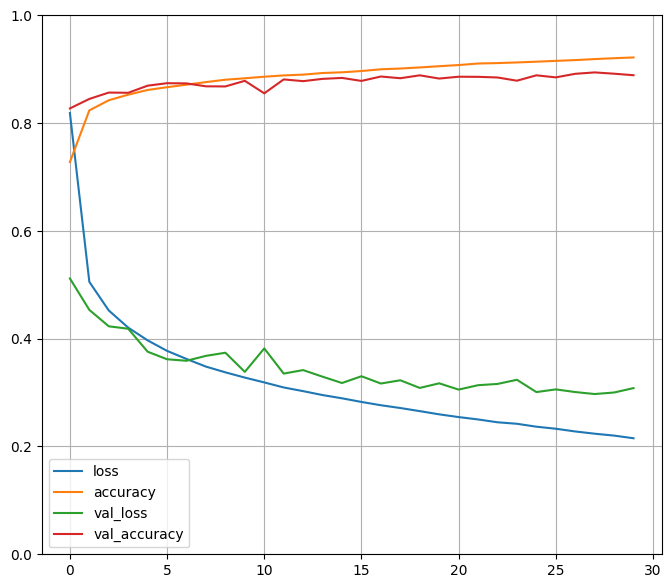

In [59]:
pd.DataFrame(model_history.history).plot(figsize=(8,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 56.8072 - accuracy: 0.8499


[56.807186126708984, 0.8499000072479248]

In [62]:
print(model.metrics_names)

['loss', 'accuracy']


In [63]:
X_new = X_test[:5]

In [64]:
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 192ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [65]:
y_pred = model.predict(X_new)
classes = np.argmax(y_pred,axis=1)
print(classes)

1/1 [==============================] - 0s 27ms/step
[9 2 1 1 6]


In [66]:
np.array(class_names)[classes]

array(['Sneaker', 'Pullover', 'Trouser', 'Trouser', 'Shirt'], dtype='<U11')

AxesImage(size=(28, 28))


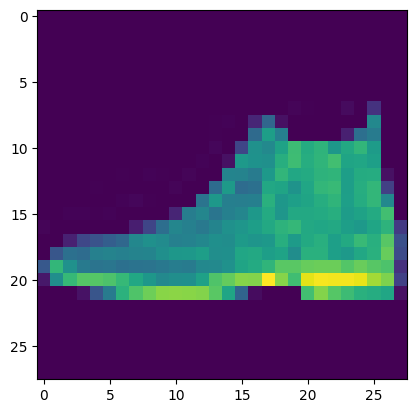

In [68]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


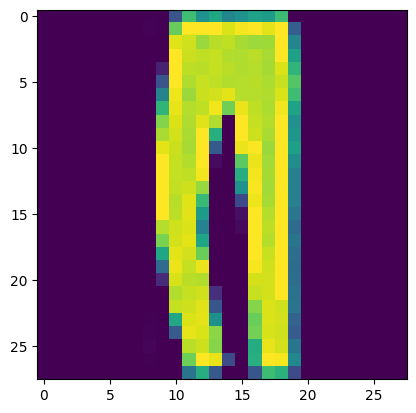

In [69]:
print(plt.imshow(X_test[2]))

AxesImage(size=(28, 28))


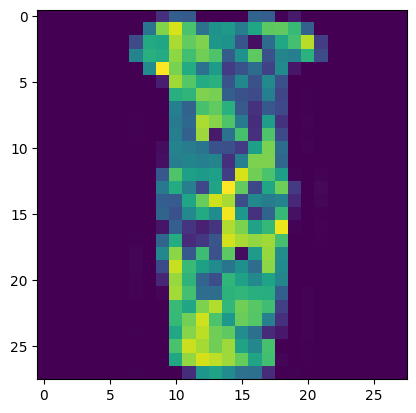

In [70]:
print(plt.imshow(X_test[100]))